In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Loading Data
Let's get started by loading the housing data into a dataframe using pd library

In [2]:
h_d = pd.read_csv('../input/housing-prices-dataset/Housing.csv')

In [3]:
h_d.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


From the pricing data we observe the values are continous, thus its a regression problem. We will need a regressor model to predict prices <br>

In [4]:
h_d.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

No null values in the data

In [5]:
h_d.duplicated().sum()

0

No duplicate rows

# Exploratory Data Analysis
## Checking various price v/s attribute variations in viz

### Boxplot : Price v/s bedroom

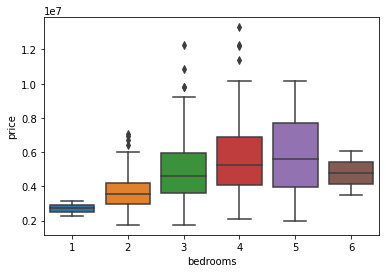

In [6]:
sns.boxplot(x=h_d['bedrooms'],y=h_d['price'])
plt.show()

Conclusion: Bedrooms with 4 houses may have other features that are usually the costliest to buy 

### Violinplot : Price v/s furnishing status

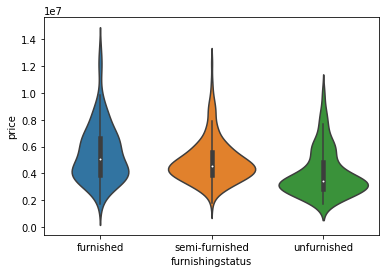

In [7]:
sns.violinplot(x=h_d['furnishingstatus'],y=h_d['price'])
plt.show()

Conclusion: Unfurnished houses are most economical

### Strip plot : Price v/s Parking

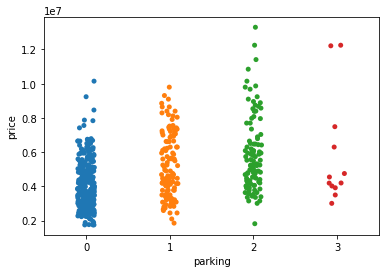

In [8]:
sns.stripplot(x=h_d['parking'],y=h_d['price'])
plt.show()

Conclusion : Most of the houses have no parking; houses with 2 parking slots have highest prices.

# Correlation
Strength and direction of linear relation between 2 attributes

In [9]:
corr = h_d.corr()
corr

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


From the above table we observe that area, bathrooms, stories are most significant factors to affect the pricing value.

In [10]:
h_d.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

We need to label encode the object data types to train our model

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lb = LabelEncoder()

I will put all the object datatype columns into a list so I can iterate through them to Label Encode them.

In [13]:
cat_data = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for i in cat_data:
    h_d[i] = lb.fit_transform(h_d[i])

In [14]:
h_d.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


Now, all our columns are labelEncoded. 

# Evaluation functions

I will create two function that will test my Training and Test scores and some Error Metrics respectively

In [15]:
def eval(model):
    print("The training score is,",model.score(x_train,y_train),end='\n')
    print("The testing score is,",model.score(x_test,y_test))

In [16]:
def metric_score(ypred,y_test):
    print("The mean absolute error is: ",mean_absolute_error(ypred,y_test))
    print("The mean squared error is: ",mean_squared_error(ypred,y_test))
    print("The R2 score is: ",r2_score(ypred,y_test))

# Splitting the data

In [17]:
x=h_d.drop('price',axis=1)
y=h_d.price

In [18]:
print(x.head())
print(y.head())
print(type(x))
print(type(y))

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 0  
1                0                1        3         0                 0  
2                0                0        2         1                 1  
3                0                1        3         1                 0  
4                0                1        2         0                 0  
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64
<class 'pandas.core.f

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,confusion_matrix,r2_score

In [20]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 5)

We split the data into training and test sets with 70:30 ratio

In [21]:
print(x_train.shape,"",type(x_train))
print(y_train.shape,"\t ",type(y_train))
print(x_test.shape,"",type(x_test))
print(y_test.shape,"\t ",type(y_test))

(381, 12)  <class 'pandas.core.frame.DataFrame'>
(381,) 	  <class 'pandas.core.series.Series'>
(164, 12)  <class 'pandas.core.frame.DataFrame'>
(164,) 	  <class 'pandas.core.series.Series'>


# Model Validation
We will use 3 models to check who's accuracy is best

## 1) Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
DTRmodel = DecisionTreeRegressor(criterion='squared_error',splitter='best',max_depth = 10, min_samples_split=20,random_state=42)
DTRmodel.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=42)

In [24]:
eval(DTRmodel)

The training score is, 0.7359034045875587
The testing score is, 0.4137533567860191


In [25]:
ypred = DTRmodel.predict(x_test)

In [26]:
metric_score(ypred,y_test)

The mean absolute error is:  907505.2489050085
The mean squared error is:  1471210626716.3113
The R2 score is:  0.35889060137566764


Conclusion: When number of min sample split were low it was observed to be a highly overfit model with very bad test scores. On increasing min sample split and max depth the training scored reduced with around 20% increase in test scores. Still not a very good model for predictions.

## 2) Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
RFRmodel = RandomForestRegressor(n_estimators=100,max_depth = 10, min_samples_split=10,random_state=42,criterion='squared_error')
RFRmodel.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, random_state=42)

In [29]:
eval(RFRmodel)

The training score is, 0.8294445816326053
The testing score is, 0.6541797646271963


In [30]:
ypred2 = RFRmodel.predict(x_test)

In [31]:
metric_score(ypred2,y_test)

The mean absolute error is:  719418.2400521481
The mean squared error is:  867850436506.9796
The R2 score is:  0.5034936387237565


Conclusion: We see a significant 20% improve in testing score compared to Decision Tree Regressor, lesser error variation and 15% R2 score improvement. Changing hyper parameters give about 5-7% change in scores.

## 3) Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
LRmodel = LinearRegression()
LRmodel.fit(x_train,y_train)

LinearRegression()

In [34]:
eval(LRmodel)

The training score is, 0.6722721620878298
The testing score is, 0.670112729781189


In [35]:
ypred3 = LRmodel.predict(x_test)

In [36]:
metric_score(ypred3,y_test)

The mean absolute error is:  721569.6538611307
The mean squared error is:  827865989822.312
The R2 score is:  0.5614064514555352


Conclusion: Linear Regression Model the best model so far, having 6-8% better score than Random Forest.

# Accuracy plot

Lets plot the scores in a pie plot

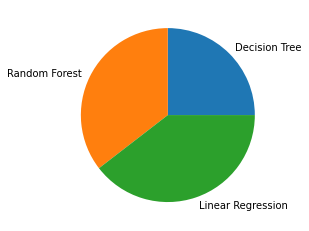

In [37]:
import matplotlib.pyplot as plt

models = ['Decision Tree','Random Forest','Linear Regression']
scores = [35.5,50.3,56.1]

plt.pie(scores,labels=models)
plt.show()

### Thank you! Hope it helped!